#### First, load the data, from the supplied data file and run first 5 rows to briefly check the content

In [8]:
import pandas as pd
import numpy as np
dataHealth = pd.read_csv("CustomerMedicalConditions04Nov21.csv")
dataActivity = pd.read_csv("CCDate2018-2021.csv")
dataUser = pd.read_csv("Users2021.csv")
dataMedical = pd.read_csv("Medical_Issue.csv")

print(dataMedical.head())


             Conditions Physical Mental Hereditary? Mental_or_Fhysical
0          Spina Bifida      Yes     No          No           Physical
1                  COPD      Yes     No          No           Physical
2              Dementia       No    Yes          No             Mental
3          Brain Injury       No    Yes         Yes             Mental
4  Elderly Care/Support      Yes     No          No           Physical


In [9]:
print(dataActivity.head())


              Time                             VisitorID  ExternalID  Role  \
0  11/1/21 5:10 PM  F7331B56-15F0-4793-9E09-5D9E2510A053      5325.0  User   
1  11/1/21 5:10 PM  F7331B56-15F0-4793-9E09-5D9E2510A053      5325.0  User   
2  11/1/21 5:08 PM  618B75EE-0A49-454C-82B7-6827A9BBA6A5      8899.0  User   
3  11/1/21 5:08 PM  618B75EE-0A49-454C-82B7-6827A9BBA6A5      8899.0  User   
4  11/1/21 5:07 PM  F7331B56-15F0-4793-9E09-5D9E2510A053      5325.0  User   

         Location        Link Title Link  Type                 ContentInfo  \
0     Broom Court     Comfort Break   Services  -1|329|10|Comfort Break|1|   
1     Broom Court           Ask For   Category                         NaN   
2  67 Glamis Road      My Care Team   Category                         NaN   
3  67 Glamis Road           My Care   Category                         NaN   
4     Broom Court  Family & Friends   Internet                         NaN   

            URL  
0          LIST  
1           NaN  
2       

In [10]:
print(dataUser.head())

   User ID                             VisitorID  ExternalID Birth date  \
0      213  7447300C-B772-4779-9AC8-0A28B5BBBFF4         NaN        NaN   
1      298  F298F6B9-77E2-459D-96EE-F588FA2BC5B1         NaN        NaN   
2      314  5E896124-3F0E-4D01-915D-BAE9B3F1A39A         NaN        NaN   
3      370  E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C       999.0        NaN   
4      387  D7686862-D926-49CB-93CA-B8676CA2A91A         NaN        NaN   

  Gender          Location  
0   Male               NaN  
1   Male               NaN  
2   Male               NaN  
3   Male  Aberdeen Council  
4   Male               NaN  


#### 1. What is the general type of the data?

In this Cloverclogs data set, all the files are tabular data formate. 

#### 2. How large and complex is it?

In [11]:
rowH=dataHealth.shape[0]
columH=dataHealth.shape[1]
print("dataHealth Fram has ", rowH, "rows and", columH, "Columns")
rowA=dataActivity.shape[0]
columA=dataActivity.shape[1]
print("dataActivity Fram has ", rowA, "rows and", columA, "Columns")
rowU=dataUser.shape[0]
columU=dataUser.shape[1]
print("dataUser Fram has ", rowU, "rows and", columU, "Columns")


dataHealth Fram has  1311 rows and 7 Columns
dataActivity Fram has  654915 rows and 9 Columns
dataUser Fram has  3641 rows and 6 Columns


# Clean Data and Summarise Statistics

#### Clean Data (focus on the CareSysCondition): 

1. remove the empty value in CareSysCondition column
2. check any missing data
3. remove duplicates(one person has one medical issue and multiple StaffPlanCondition, but don't consider Staff right now)

In [13]:
# 1. remove empty value in CareSysCondition column
newDataHealth=dataHealth[dataHealth.CareSysCondition.notnull()]


In [14]:
# 2. check any missing data
#First, check the primary key in CustomerMedicalCondition dataframe
newDataHealth.loc[newDataHealth['External ID']==" "]
# find what is the user id for the empty enternal ID from User table
dataUser.loc[dataUser['User ID']==807]
# get the External ID, which is 4710
# fill the absent external ID in CustomerMedicalCondition table
newDataHealth.at[6,'External ID']=4710
print(newDataHealth.iloc[5])
# check if the empty external id (row5) changed to 4710 


External ID                 4710
CleverCogsUserId             807
Gender                         F
DateOfBirth            1/21/1937
Age                         84.0
StaffPlanConditions          NaN
CareSysCondition        Dementia
Name: 6, dtype: object


In [15]:
# 3. remove duplicates
# I would like to make sure for each person, only show the medical issue once without considering different StaffPlanCondition.
# Thus, create new dataframe that does not have StaffPlanCondition

newDataHealth_removeStaff= newDataHealth[newDataHealth.columns.difference(['StaffPlanConditions'])]
newDataHealth_duplicates_removed = newDataHealth_removeStaff.drop_duplicates()
# for example, the person whose "external ID = 9252" occursed 11 times before in the dataframe
# Now, check whether this person only shows once in the dataframe
newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed["External ID"]=='9252']


,Age,CareSysCondition,CleverCogsUserId,DateOfBirth,External ID,Gender
1192,44.0,Cerebral Palsy,5329,3/24/1977,9252,F


#### Analyse and summarise statistic data:
##### (based on the cleaned dataframe called "newDataHealth_duplicates_removed")

1. How many people browsed the website:

In [16]:
visitorNum=dataActivity["VisitorID"].value_counts()
print("Summary: ",visitorNum.shape[0],"users have browsed the cleverclogs")

Summary:  833 users have browsed the cleverclogs


3. "Gender" distribution:

In [18]:
newDataHealth_duplicates_removed=newDataHealth_duplicates_removed.drop(newDataHealth_duplicates_removed[newDataHealth_duplicates_removed.Gender=="U"].index)
female=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['Gender']=="F"].shape[0]
male=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['Gender']=="M"].shape[0]
unspecified=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['Gender']=="U"].shape[0]
print("Female customer:" , female)
print("Male customer:" , male)
print("Unspecified gender customer:" , unspecified)



Female customer: 494
Male customer: 368
Unspecified gender customer: 0


4. Group "Age":

In [19]:
newDataHealth_duplicates_removed=newDataHealth_duplicates_removed.drop(newDataHealth_duplicates_removed[newDataHealth_duplicates_removed.Age<19].index)
juvenile=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['Age']<19].shape[0]
youngAdult=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Age']>=19) & (newDataHealth_duplicates_removed['Age']<30)].shape[0]
middleAged=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Age']>=30) & (newDataHealth_duplicates_removed['Age']<50)].shape[0]
oldAdult=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Age']>=50) & (newDataHealth_duplicates_removed['Age']<70)].shape[0]
Senior=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['Age']>=70].shape[0]
print("Count people in different age groups based on people who has medical consition:")
print()
print("juvenile: ",juvenile)
print("YoungAdult: ",youngAdult)
print("MiddleAged: ",middleAged)
print("OldAdult: ",oldAdult)
print("Senior: ",Senior)

print()


Count people in different age groups based on people who has medical consition:

juvenile:  0
YoungAdult:  25
MiddleAged:  104
OldAdult:  208
Senior:  524



5. Count different medical condition in category and find Max/Min: 

In [20]:
print("Here is the CareCondition Category: ")
category=newDataHealth_duplicates_removed.CareSysCondition.value_counts()
totalCategoryNum=category.shape[0]
print(category)
print()
print("There are ",totalCategoryNum," kinds of conditions in the customer in total")
print()

print("Max and Min:")
condition_Max=category.max()
condition_Min=category.min()
print(condition_Max)
print("'Elderly Care/Support' has the largest number of people, which is: ",condition_Max)
print("Both 'Progressive Supranuclear Palsy' and 'Cerebellar Ataxia' has the smallest number of people, which is: ",condition_Min)


# cleaned_DataHealth.StaffPlanConditions.value_counts()

Here is the CareCondition Category: 
Elderly Care/Support              253
Dementia                          105
Mental Health Issues               79
Cerebral Palsy                     42
Learning Difficulties              36
Stroke                             34
COPD                               34
Brain Injury                       33
Multiple Sclerosis                 32
Cancer                             30
Lifelong Mobility Issues           26
Arthritis                          23
Parkinsons                         20
Diabetes                           19
Spina Bifida                       18
Epilepsy                           14
Amputee                            13
Visual Impairment                  10
Spinal Injury                       8
Huntington's                        7
Bi Polar Disorder                   6
Addiction Issues                    5
Asthma                              4
Muscular Dystrophy                  4
Down Syndrome                       2
OCD          

In [188]:
num=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['CareSysCondition']=="Mental Health Issue"].shape[0]
print(num)

0


# Explore data

#### 1. Data Distribution: 

1. Gender distribution:

        Gender  Number
0       Female     494
1         Male     368
2  Unspecified       0


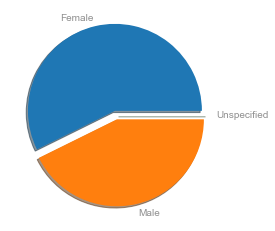

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# chart = sns.distplot(newDataHealth_duplicates_removed["Gender"])
# chart.set_title('The distribution of tips')
# plt.show()
gender_Group = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Unspecified'],
    'Number': [female, male, unspecified]
})
print(gender_Group)
explode = [0.05, 0.05, 0.05]
plt.pie(gender_Group["Number"], shadow = True,labels=gender_Group["Gender"],explode = explode)

plt.show()


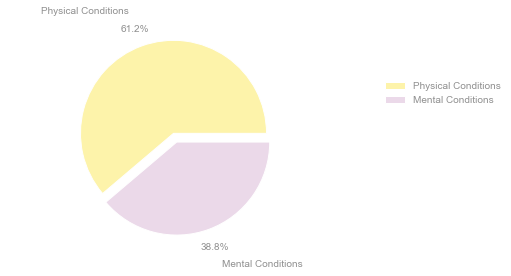

In [167]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Physical Conditions', 
         'Mental Conditions']
color_palette_list = ['#FDF3AA','#EBD9E9']
percentages = [61.2, 38.8]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4,textprops= {'fontsize': 10})
ax.axis('equal')
# ax.set_title("Physical and Mental disease proportion distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8),prop={'size': 10})


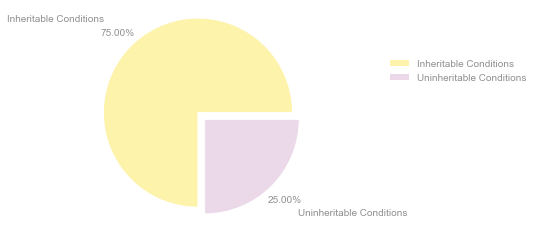

In [201]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Inheritable Conditions', 
         'Uninheritable Conditions']
color_palette_list = ['#FDF3AA','#EBD9E9']
percentages = [75,25]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.2f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4,textprops= {'fontsize': 10})
ax.axis('equal')

# ax.set_title("Physical and Mental disease proportion distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8),prop={'size': 10})


In [ ]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Male', 
         'Female']
color_palette_list = ['#FDF3AA','#EBD9E9']
percentages = [30.01,69.99]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.2f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4,textprops= {'fontsize': 10})
ax.axis('equal')
# ax.set_title("Physical and Mental disease proportion distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8),prop={'size': 10})


In [62]:
Physical_Medical = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Number': [292,222]
})
Mental_Medical = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Number': [182,144]
})
print(Physical_Medical)

   Gender  Number
0  Female     292
1    Male     222


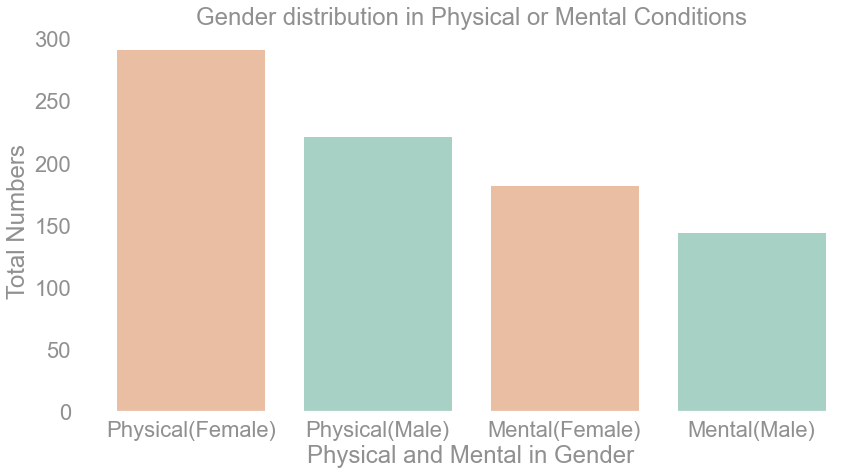

In [179]:
Gender = ['Physical(Female)','Physical(Male)','Mental(Female)','Mental(Male)']
Total_Num = [292,222,182, 144]
plt.figure(figsize = (14,7))
New_Colors = ['#EABEA3','#A7D1C5','#EABEA3','#A7D1C5']

ax = plt.axes()
# Setting the background color
ax.set_facecolor("white")

plt.bar(Gender, Total_Num, color=New_Colors)
plt.title('Gender distribution in Physical or Mental Conditions')
plt.xlabel('Physical and Mental in Gender')
plt.ylabel('Total Numbers')
plt.show()

In [50]:
a=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Spina Bifida")].shape[0]
b=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="COPD")].shape[0]
c=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Elderly Care/Support")].shape[0]
d=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Epilepsy")].shape[0]
e=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Multiple Sclerosis")].shape[0]
f=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Diabetes")].shape[0]
g=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Amputee")].shape[0]
h=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Learning Difficulties")].shape[0]
i=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Visual Impairment")].shape[0]
m=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Arthritis")].shape[0]
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Lifelong Mobility Issues")].shape[0]
o=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Spinal Injury")].shape[0]
p=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Asthma")].shape[0]
q=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Muscular Dystrophy")].shape[0]
r=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cancer")].shape[0]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(m)
print(n)
print(o)
print(p)
print(q)
print(r)

10
20
161
6
19
7
6
15
6
16
11
2
4
1
18


In [52]:
a=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Dementia")].shape[0]
b=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Brain Injury")].shape[0]
c=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cerebral Palsy")].shape[0]
d=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Stroke")].shape[0]
e=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Huntington's")].shape[0]
f=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Parkinsons")].shape[0]
g=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Down Syndrome")].shape[0]
h=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Progressive Supranuclear Palsy")].shape[0]
i=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Bipolar Disorder")].shape[0]
m=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cerebellar Ataxia")].shape[0]
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Mental Health Issues")].shape[0]
o=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="OCD")].shape[0]
p=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Addiction Issue")].shape[0]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(m)
print(n)
print(o)
print(p)


70
13
16
15
6
7
2
0
0
0
51
2
0


In [51]:
a=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Spina Bifida")].shape[0]
b=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="COPD")].shape[0]
c=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Elderly Care/Support")].shape[0]
d=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Epilepsy")].shape[0]
e=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Multiple Sclerosis")].shape[0]
f=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Diabetes")].shape[0]
g=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Amputee")].shape[0]
h=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Learning Difficulties")].shape[0]
i=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Visual Impairment")].shape[0]
m=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Arthritis")].shape[0]
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Lifelong Mobility Issues")].shape[0]
o=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Spinal Injury")].shape[0]
p=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Asthma")].shape[0]
q=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Muscular Dystrophy")].shape[0]
r=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cancer")].shape[0]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(m)
print(n)
print(o)
print(p)
print(q)
print(r)

8
14
92
8
13
12
7
21
4
7
15
6
0
3
12


In [53]:
a=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Dementia")].shape[0]
b=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Brain Injury")].shape[0]
c=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cerebral Palsy")].shape[0]
d=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Stroke")].shape[0]
e=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Huntington's")].shape[0]
f=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Parkinsons")].shape[0]
g=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Down Syndrome")].shape[0]
h=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Progressive Supranuclear Palsy")].shape[0]
i=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Bipolar Disorder")].shape[0]
m=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Cerebellar Ataxia")].shape[0]
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Mental Health Issues")].shape[0]
o=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="OCD")].shape[0]
p=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Addiction Issue")].shape[0]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(m)
print(n)
print(o)
print(p)


35
20
26
19
1
13
0
1
0
1
28
0
0


In [194]:
E=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['CareSysCondition']=="Elderly Care/Support"].shape[0]
F=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['CareSysCondition']=="Dementia"].shape[0]
G=newDataHealth_duplicates_removed.loc[newDataHealth_duplicates_removed['CareSysCondition']=="Mental Health Issues"].shape[0]
Sum=newDataHealth_duplicates_removed.shape[0]
a=E+F+G

print(a/Sum)

0.5075493612078978


In [90]:
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="M") & (newDataHealth_duplicates_removed['CareSysCondition']=="Mental Health Issues")]
young=n.loc[(n["Age"]>25)&(n["Age"]<44)].shape[0]
middle=n.loc[(n["Age"]>=44)&(n["Age"]<60)].shape[0]
elderly=n.loc[(n["Age"]>=60)&(n["Age"]<75)].shape[0]
senile=n.loc[(n["Age"]>=75)&(n["Age"]<90)].shape[0]
long=n.loc[n["Age"]>=90].shape[0]
print(young)
print(middle)
print(elderly)
print(senile)
print(long)


7
15
5
0
0


In [93]:
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Dementia")]
young=n.loc[(n["Age"]>25)&(n["Age"]<44)].shape[0]
middle=n.loc[(n["Age"]>=44)&(n["Age"]<60)].shape[0]
elderly=n.loc[(n["Age"]>=60)&(n["Age"]<75)].shape[0]
senile=n.loc[(n["Age"]>=75)&(n["Age"]<90)].shape[0]
long=n.loc[n["Age"]>=90].shape[0]
print(young)
print(middle)
print(elderly)
print(senile)
print(long)

0
0
3
40
27


In [92]:
n=newDataHealth_duplicates_removed.loc[(newDataHealth_duplicates_removed['Gender']=="F") & (newDataHealth_duplicates_removed['CareSysCondition']=="Elderly Care/Support")]
young=n.loc[(n["Age"]>25)&(n["Age"]<44)].shape[0]
middle=n.loc[(n["Age"]>=44)&(n["Age"]<60)].shape[0]
elderly=n.loc[(n["Age"]>=60)&(n["Age"]<75)].shape[0]
senile=n.loc[(n["Age"]>=75)&(n["Age"]<90)].shape[0]
long=n.loc[n["Age"]>=90].shape[0]
print(young)
print(middle)
print(elderly)
print(senile)
print(long)

0
0
12
63
86


From the pie chart, it shows the proportion of each gender category. And we can see more than a half of the customers are female person, and only a small part of proportion is for the people who recognized as unspecified gender. Overall. for the population: female > male

2. Age distribution:

In the distribution graph, it's clear that age between80-100 has the largest amount of people who have medical issue. Thus, it implies that old people who are between 80 to 100 years old can easily have some diabilities and hight likely need medial care services.

3. Care System Condition Distribution:

<ipython-input-152-4a4d3a28f63e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


<AxesSubplot:title={'center':'Frequency in CareSysCondition'}, xlabel='count', ylabel='CareSysCondition'>

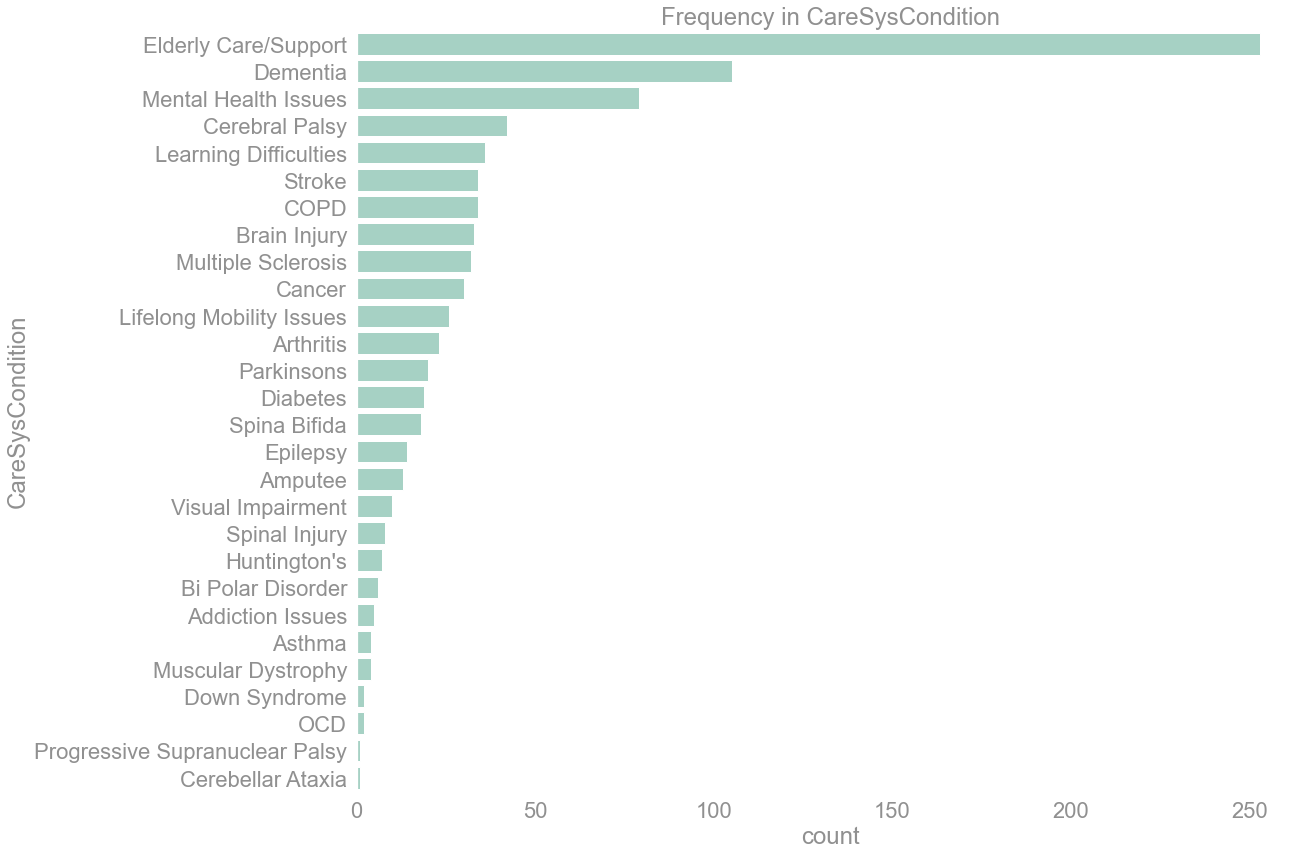

In [152]:
plt.figure(figsize = (17,14))
plt.title("Frequency in CareSysCondition")
colors = ["#9FD8C7"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("white")
sns.countplot(y="CareSysCondition", data=newDataHealth_duplicates_removed,palette=["C0"],order = newDataHealth_duplicates_removed['CareSysCondition'].value_counts().index)


In this bar chat, it focuses on counting the users' medical conditions and it clearly shows the top three conditions---Elderly Care/Support, Dementia, and Mental health issue.

#### 2. Visualization in Relations 

<AxesSubplot:xlabel='count', ylabel='CareSysCondition'>

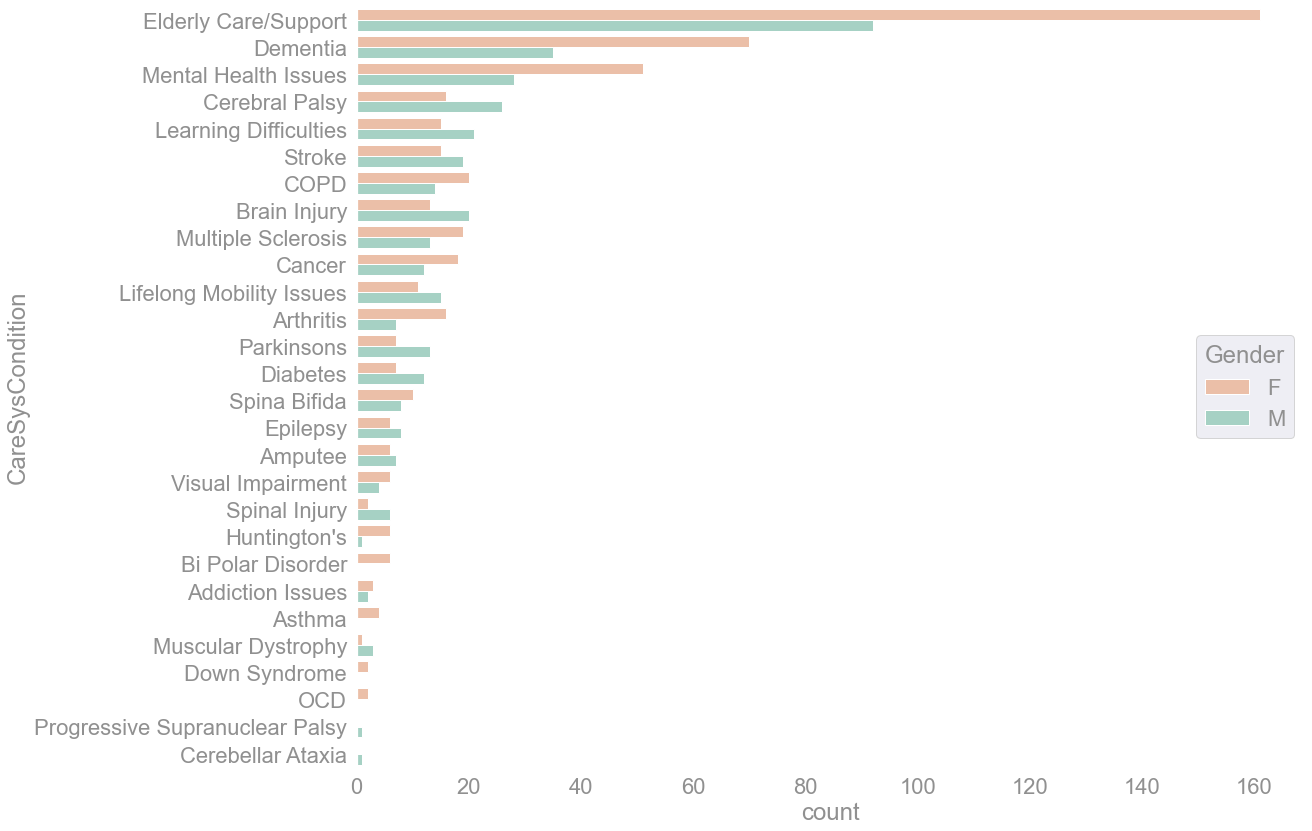

In [177]:
a= newDataHealth_duplicates_removed[['CareSysCondition','Gender']]
F_Cond=a.loc[a['Gender']=="F"]
M_Cond=a.loc[a['Gender']=="M"]
Condition_Count_F=F_Cond.CareSysCondition.value_counts()
Condition_Count_M=M_Cond.CareSysCondition.value_counts()
# print(Condition_Count_F)
plt.figure(figsize = (17,14))
# plt.title("Relation in CareSysCondition and Female")
# sns.lineplot(y="CareSysCondition", data=F_Cond, palette="OrRd")

ax = plt.axes()
# Setting the background color
ax.set_facecolor("white")

colors = ["#F6BB9D","#9FD8C7"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.countplot(y="CareSysCondition", hue="Gender", data=a,palette=customPalette,order = newDataHealth_duplicates_removed['CareSysCondition'].value_counts().index)

In this history graph, I use gender as the category to divide the users into three parts. Thus, we can check which kind of medical issue highly exists in a certain gender group. For example, "Elderly care/support", "Epilepsy", and "Cerebral Palsy" are the most common medical conditions in males.

3. Age distribution in different medical conditions:

<AxesSubplot:xlabel='Age', ylabel='CareSysCondition'>

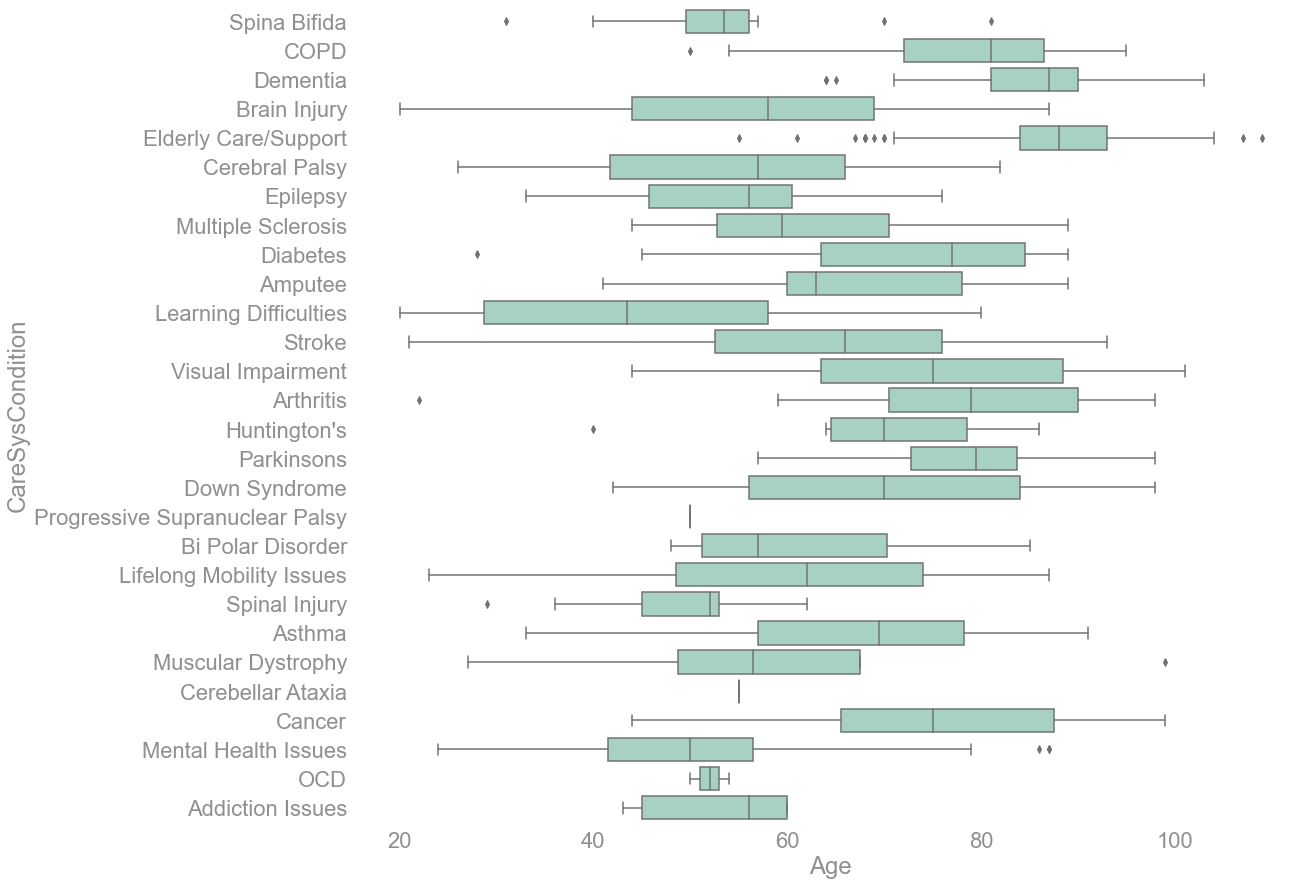

In [178]:
plt.figure(figsize = (17,15))
ax = plt.axes()
# Setting the background color
ax.set_facecolor("white")
# ax = sns.violinplot(x="Age", y="CareSysCondition", hue="Gender",
#                     data=newDataHealth_duplicates_removed, palette="muted")
sns.boxplot(data = newDataHealth_duplicates_removed
            ,x = 'Age'
            ,y = 'CareSysCondition'
            ,palette=["C1"]
            )

In this boxplot, it shows the relationship between age and medical condition. For each condition, it has the Max/Min/Median age, and can reflect the range of the age for the people who high likely have these kinds of medical issue. 